<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa_after/PSD_histogram_BEST_sample_08_value_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [59]:
Repetir = 40

In [60]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4

In [61]:
#!pip install mahotas

In [62]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [63]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 485 (delta 109), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (485/485), 166.45 MiB | 28.11 MiB/s, done.
Resolving deltas: 100% (232/232), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado


In [64]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [65]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [66]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.32 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines


In [67]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [68]:
FILE='SugarSample08_new.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=',' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=',' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [69]:
df_ImgJ.head()

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047


In [70]:
name

'sample_08_03.csv'

In [71]:
f.namelist()

['sample_08_01.csv', 'sample_08_02.csv', 'sample_08_03.csv']

In [72]:
#df_ImgJ.head()

In [73]:
#df_ImgJ.head()

In [74]:
from Segment_Filter_Reviseted_2022 import Segmenta  # got image provided segmented

In [75]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.73 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [76]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [77]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [78]:
Img_Size = 28

In [79]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [80]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 3s 151ms/step - loss: 0.6153 - accuracy: 0.6764 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 128ms/step - loss: 0.3460 - accuracy: 0.8484 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 132ms/step - loss: 0.3461 - accuracy: 0.8397 - val_loss: 0.6942 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 130ms/step - loss: 0.1950 - accuracy: 0.9271 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1295 - accuracy: 0.9621 - val_loss: 0.6957 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0948 - accuracy: 0.9679 - val_loss: 0.6979 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 131ms/step - loss: 0.0805 - accuracy: 0.9708 - val_loss: 0.7008 - val_accuracy: 0.5102

In [81]:
Y_test = yback(Y_test)

In [82]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         1  74


In [83]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.96      0.99      0.97        75

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



In [84]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [85]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [86]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [87]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,66.897499,65.339165,70.455101,72.259987,75.209961,77.137680,76.001106,71.079384,62.863457,52.032372,49.844353,52.058521,54.187492,56.350471,57.981728,52.946003,56.800026,81.713745,97.705002,98.286285,90.528496,87.494987,84.414024,83.987488,85.208206,89.084320,100.904243,107.624550,70.441635,71.087067,73.690346,74.541061,77.109093,78.929634,76.407478,70.743378,60.020794,48.652206,49.062820,49.082336,...,74.680351,72.043213,70.050278,70.055542,70.965660,68.499161,65.807793,66.690781,63.331074,61.743401,56.670273,55.481846,100.855980,105.297752,108.679352,111.968933,118.976242,127.837479,131.840729,124.529404,87.156723,62.952892,65.258202,65.370224,60.942120,59.828602,64.641457,67.330544,69.115417,71.831665,72.589951,72.841927,70.933182,64.756866,56.495949,48.471176,50.082340,56.068542,58.607212,58.637890
1,70.734177,71.357620,73.205109,76.392738,78.575165,78.461647,78.973434,80.081825,82.960106,82.744148,83.235497,84.392120,83.759857,81.893440,76.854713,74.300659,73.475166,73.724747,73.395599,74.804794,75.853897,77.715256,79.122940,77.891060,77.791687,82.294243,83.709106,82.311935,67.515266,69.436722,72.049858,74.720032,74.418213,75.749405,76.683563,76.241783,79.108871,80.241173,80.326004,82.046249,...,1.556520,1.810737,0.959907,1.071375,1.114200,2.835667,6.806707,1.203538,1.557954,1.140086,0.834028,1.080732,8.179087,8.537122,8.391571,8.190765,8.663137,8.244314,8.555084,11.149717,15.924596,18.862373,16.817362,16.312342,14.311180,12.641760,11.134007,9.458712,9.236870,9.307766,8.661157,8.855679,8.583362,10.492521,10.312479,8.398401,9.026022,8.306809,8.854382,8.010998
2,43.664398,61.515770,70.513741,72.783127,72.669235,81.109543,85.430847,88.112793,92.739540,93.917442,89.518341,78.284485,61.729721,49.848007,45.907272,39.885353,24.780382,23.262493,25.877020,30.256256,43.178707,53.249458,68.246300,75.223808,77.689644,79.119919,81.162674,80.251228,35.810360,40.187927,45.935226,48.197041,54.445114,64.454651,71.505287,70.363503,67.416962,58.285416,50.748718,46.711445,...,0.381581,0.801975,0.626525,0.407035,0.163632,0.337214,0.266332,0.266332,0.366708,0.258579,0.262089,0.345522,5.757758,5.088886,5.518067,5.575339,5.571096,5.368879,5.468574,5.816443,5.643216,5.839776,5.373121,5.326456,5.633317,5.222166,5.600439,6.051892,5.484836,5.986136,5.887149,5.744324,5.819448,5.764652,5.627661,5.743618,5.569708,5.742885,5.590187,5.225348
3,74.365952,73.072723,71.889915,72.225128,68.297516,62.120987,61.460495,60.368263,58.527267,60.953720,63.223473,65.766281,68.484619,71.370575,75.356689,77.232391,80.133881,85.476692,89.055206,90.243309,91.339500,88.037682,82.474045,77.764633,77.873383,79.404625,79.661812,80.656860,75.228096,72.968262,73.163307,74.695206,72.831734,65.966278,66.171234,65.896202,61.699505,60.468430,63.446281,65.782806,...,133.400986,137.112732,140.505463,141.320648,96.203316,60.939835,59.424789,59.802311,59.508427,59.331898,66.899506,77.402641,111.379501,112.301147,112.414551,111.441315,115.089912,117.252556,119.252556,114.206604,106.774872,105.258179,105.936859,107.717346,111.073051,115.198677,118.820496,123.836021,129.589432,135.806946,142.695190,145.980499,135.053543,82.445282,57.053879,57.858509,59.318016,59.108429,65.641983,74.189423
4,98.843483,98.876495,101.115311,102.936432,105.947823,109.188759,116.103363,119.762177,121.753319,111.992439,68.556694,62.921280,61.038086,60.490601,61.620308,56.822002,44.866203,44.796848,48.636299,51.504475,53.174263,55.074680,56.069767,54.405563,52.771023,52.156456,53.424713,53.440552,99.988564,99.054123,100.309967,101.510628,105.003571,108.401009,115.554832,120.592667,122.899841,101.466064,63.191654,63.232956,...,95.589455,96.112610,105.348518,117.930176,131.103516,138.218048,129.955948,128.381287,135.414780,139.276993,129.72

In [88]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [89]:
#df_ann

In [90]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [91]:
img_graos.shape

(106, 785)

In [92]:
prediction

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [93]:
img_graos.shape

(106, 785)

In [94]:
Width=np.array(Width_new)

In [95]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

#from Get_PSDArea_Revival import PSDArea
from Get_PSDArea_Reviseted_2022_value_12 import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 903, done.
remote: Counting objects: 100% (664/664), done.
remote: Compressing objects: 100% (662/662), done.
remote: Total 903 (delta 436), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (903/903), 6.53 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (573/573), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [96]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 21.06 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  0.807
1   2  1.407
2   3  1.177


''

In [97]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [98]:
Width.shape

(106,)

In [99]:
Width

array([199, 110, 139, 163, 141, 188, 125, 198, 189, 198, 131, 176, 168,
       184, 144, 155, 174, 163, 186, 161, 159, 145, 187, 172, 198, 186,
       144, 174, 131, 113, 121, 191, 197, 109, 195, 190, 119, 187, 178,
       126, 177, 104, 153, 135, 147, 158, 136, 126, 144, 176, 188, 159,
       161, 196, 133, 141, 175, 164, 121, 140, 189, 106, 160, 198, 138,
       135, 197, 146, 128, 182, 171, 110, 174, 167, 178, 168, 186, 128,
       129, 194, 150, 108, 116, 108, 131, 152, 128, 181, 140, 172, 189,
       195, 163, 193, 114, 185, 105, 138, 110, 137, 198, 103, 107, 145,
       155, 187])

In [100]:
img_graos.shape

(106, 785)

In [101]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,199.0,43.664398,61.515770,70.513741,72.783127,72.669235,81.109543,85.430847,88.112793,92.739540,93.917442,89.518341,78.284485,61.729721,49.848007,45.907272,39.885353,24.780382,23.262493,25.877020,30.256256,43.178707,53.249458,68.246300,75.223808,77.689644,79.119919,81.162674,80.251228,35.810360,40.187927,45.935226,48.197041,54.445114,64.454651,71.505287,70.363503,67.416962,58.285416,50.748718,...,0.381581,0.801975,0.626525,0.407035,0.163632,0.337214,0.266332,0.266332,0.366708,0.258579,0.262089,0.345522,5.757758,5.088886,5.518067,5.575339,5.571096,5.368879,5.468574,5.816443,5.643216,5.839776,5.373121,5.326456,5.633317,5.222166,5.600439,6.051892,5.484836,5.986136,5.887149,5.744324,5.819448,5.764652,5.627661,5.743618,5.569708,5.742885,5.590187,5.225348
3,110.0,74.365952,73.072723,71.889915,72.225128,68.297516,62.120987,61.460495,60.368263,58.527267,60.953720,63.223473,65.766281,68.484619,71.370575,75.356689,77.232391,80.133881,85.476692,89.055206,90.243309,91.339500,88.037682,82.474045,77.764633,77.873383,79.404625,79.661812,80.656860,75.228096,72.968262,73.163307,74.695206,72.831734,65.966278,66.171234,65.896202,61.699505,60.468430,63.446281,...,133.400986,137.112732,140.505463,141.320648,96.203316,60.939835,59.424789,59.802311,59.508427,59.331898,66.899506,77.402641,111.379501,112.301147,112.414551,111.441315,115.089912,117.252556,119.252556,114.206604,106.774872,105.258179,105.936859,107.717346,111.073051,115.198677,118.820496,123.836021,129.589432,135.806946,142.695190,145.980499,135.053543,82.445282,57.053879,57.858509,59.318016,59.108429,65.641983,74.189423
4,139.0,98.843483,98.876495,101.115311,102.936432,105.947823,109.188759,116.103363,119.762177,121.753319,111.992439,68.556694,62.921280,61.038086,60.490601,61.620308,56.822002,44.866203,44.796848,48.636299,51.504475,53.174263,55.074680,56.069767,54.405563,52.771023,52.156456,53.424713,53.440552,99.988564,99.054123,100.309967,101.510628,105.003571,108.401009,115.554832,120.592667,122.899841,101.466064,63.191654,...,95.589455,96.112610,105.348518,117.930176,131.103516,138.218048,129.955948,128.381287,135.414780,139.276993,129.723602,59.142384,38.547955,39.461258,39.492519,44.144348,54.772987,77.519638,93.308258,100.259865,105.870285,103.508400,97.042801,93.620300,93.581848,92.845032,90.171043,89.509384,90.746643,92.976135,100.911072,112.368561,123.831223,127.479477,123.186020,123.185188,130.009155,132.784256,133.504272,92.873245
5,163.0,141.200836,149.375565,148.753876,130.216797,62.855621,59.066769,56.794159,54.261127,47.215477,35.075462,17.690617,16.134968,17.649591,18.546125,19.946629,27.692648,42.147766,55.013432,57.720726,57.235054,56.211979,54.486130,51.611050,47.687004,39.450409,22.075127,3.794384,0.927058,144.179260,146.840347,143.197113,127.687149,67.551628,56.400806,54.086037,53.132599,47.229103,35.161957,16.748089,...,64.964546,59.654072,51.159771,48.190594,48.422787,45.373142,55.586624,37.873875,47.000797,52.526100,53.883850,49.289700,83.922012,85.723434,83.652527,79.394714,73.429565,69.148178,70.934021,72.572021,72.646736,72.991646,74.132515,80.793518,89.719147,103.504982,110.480186,72.575859,67.225075,61.171024,50.538521,49.947155,56.156387,113.850769,207.376984,145.267075,28.795891,53.879333,55.159023,49.898380
6,141.0,61.942417,67.870583,70.643379,72.922844,74.253319,71.586235,85.861481,106.173737,109.862381,111.201340,111.224442,109.937279,103.002762,95.911171,93.296921,92.658714,95.711189,98.214073,100.430458,101.703041,98.657013,82.673203,58.241585,52.081135,48.086414,47.774155,50.060459,54.270313,61.529556,66.998383,66.452545,66.595695,65.697304,61.945984,80.859718,105.808762,109.333527,107.764603,108.366425,...,46.290581,43.132088,34.924553,28.691967,25.236862,24.950756,24.0309

In [102]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [103]:
 df_ImgJ

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047
...,...,...
74,37,0.901
75,38,1.165
76,39,1.264
77,40,1.021


In [104]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [105]:
len(Diameter_All)

106

In [106]:
#

#PSD_new['Area'].shape

In [107]:
#PSD_new.iloc[:,0]

In [108]:
'''
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 
'''

"\nArea2 = PSD_new['Area'].values\n#k = 0\nfor A in Area2:\n  Diam1.append((4*A/np.pi)**0.5)\n  #k = k + 1 \n"

In [109]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [110]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
0,1.145736,1.535591,1.395728,1.312999,1.154592,1.611253,1.292967,1.107307,1.694073,1.202134,1.199484,1.140724,1.484151,1.600947,1.619922,1.570435,1.303754,1.395728,1.476410,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,1.620315,...,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.538627,0.807874,0.960083,1.402137,0.935372,1.458305,0.927928,1.438338,1.352542,1.392494,0.996232,1.448817,0.980707,1.273493,0.785994,1.057406,1.432353,0.946067,1.463651,1.169558,1.190706,1.186748,1.003884,1.263221,1.345087,1.214636,1.004717,1.115325,0.809302,0.831404,0.771915,1.281004,1.280582,0.716662,1.452674,1.464248,0.923076,1.350891,1.183434,0.731315,...,1.082289,1.006373,0.556297,1.299970,1.244491,0.770556,1.209167,1.100475,1.271399,1.162754,1.366042,1.007244,0.942272,1.467866,0.981779,0.727466,0.631089,0.662085,0.654015,0.902389,0.700941,1.369504,0.776547,1.105115,1.278518,1.173552,1.121249,1.455325,0.728997,1.411622,0.534351,0.960926,0.92482,0.898727,1.518378,0.684796,0.737547,0.821904,1.039558,1.410081


In [111]:
len(Diameter_All)

106

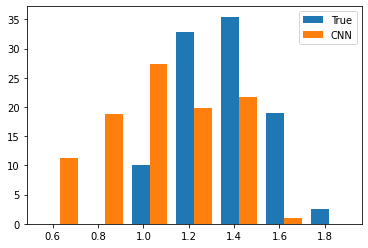

In [112]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [113]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3621288326512706 desvio= 0.20110347688312627 pontos= 79


In [114]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.0750809679645759 desvio= 0.2530664304679087 pontos= 106
